# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense.

 We are going to find some more obvious patterns with EDA before identifying the hidden patterns with NLP techniques.

1. **Most common words** - Find these by creating word clouds which give an idea about the most spoken words in a episode
2. **Amount of profanity** - Find the episodes with most abusive words which can help us to shortlist the episodes that should be rated above 18.
3. **Remove stop words** - Remove stop words and common profane words for further Topic Modelling



#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix created as input





In [3]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Avatar: The Last Airbender,Curb Your Enthusiasm,Death and Other Details,Euphoria,Game Of Thrones,Last Week Tonight with John Oliver,Peaky Blinders,Resident Alien,The Boys,The Good Doctor
aa,0,1,0,0,0,0,0,0,0,0
aah,0,0,0,1,0,0,0,0,0,0
aang,23,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,2
abandon,0,0,0,0,1,0,0,0,0,0


#### Find  and print the top 30 words said in each episode



In [27]:
import pprint

top_30_words = {}
for i in data.columns:
    # Ham yahan top 30 most commonly used words nikal rahe hain
    top = data[i].sort_values(ascending=False).head(30)

    top_30_words[i]= list(zip(top.index, top.values))#zip is used to create key,value pairs of (words,freq)

pprint.pprint(top_30_words)


{'Avatar: The Last Airbender': [('avatar', 29),
                                ('dont', 24),
                                ('aang', 23),
                                ('im', 23),
                                ('know', 23),
                                ('just', 21),
                                ('youre', 17),
                                ('come', 17),
                                ('sokka', 17),
                                ('nation', 16),
                                ('need', 16),
                                ('right', 14),
                                ('world', 14),
                                ('time', 13),
                                ('leave', 11),
                                ('thats', 11),
                                ('hes', 10),
                                ('earth', 9),
                                ('water', 9),
                                ('appa', 9),
                                ('air', 9),
                              

#### By looking at these top words, you can see that some of them have very little meaning and could be added to stop words list . Look at the most common top words and add them to the stop word list.

####Took the most occuring 15 words from each episode and would further find the common words (in more than half of the episodes) to create a final_stop_words_list


In [29]:
stop_words_list = []

for episode, top_words in top_30_words.items():
    print("Name: ", episode)

    # Prepare words with counts for display
    top_words_for_episode = [(word, count) for word, count in top_words[0:14]]
    words_with_counts = [f'{word} ({count})' for word, count in top_words_for_episode]

    # Print the words and their counts in horizontal format
    print(f'{", ".join(words_with_counts)}')

    # Add the words to stop_words_list
    stop_words_list.extend([word for word, count in top_words_for_episode])

    print('--------------------------------------------------')


Name:  Avatar: The Last Airbender
avatar (29), dont (24), aang (23), im (23), know (23), just (21), youre (17), come (17), sokka (17), nation (16), need (16), right (14), world (14), time (13)
--------------------------------------------------
Name:  Curb Your Enthusiasm
im (88), dont (47), know (46), youre (41), got (38), right (35), just (35), thats (34), dog (32), gonna (31), yeah (31), like (31), okay (26), hey (24)
--------------------------------------------------
Name:  Death and Other Details
dont (28), im (26), imogene (17), know (16), youre (15), thats (14), kira (14), mom (13), shes (12), lawrence (12), rufus (12), like (12), didnt (11), said (11)
--------------------------------------------------
Name:  Euphoria
rue (89), like (74), im (72), know (70), ooh (56), dont (51), yeah (42), fuck (41), just (39), fucking (35), good (31), shit (29), hey (24), got (23)
--------------------------------------------------
Name:  Game Of Thrones
dont (25), im (19), father (17), man (16),

In [6]:
#made a aggregated list of all the top 14 words from each episode
print(stop_words_list)

['avatar', 'dont', 'aang', 'im', 'know', 'just', 'youre', 'come', 'sokka', 'nation', 'need', 'right', 'world', 'time', 'im', 'dont', 'know', 'youre', 'got', 'right', 'just', 'thats', 'dog', 'gonna', 'yeah', 'like', 'okay', 'hey', 'dont', 'im', 'imogene', 'know', 'youre', 'thats', 'kira', 'mom', 'shes', 'lawrence', 'rufus', 'like', 'didnt', 'said', 'rue', 'like', 'im', 'know', 'ooh', 'dont', 'yeah', 'fuck', 'just', 'fucking', 'good', 'shit', 'hey', 'got', 'dont', 'im', 'father', 'man', 'let', 'mother', 'good', 'way', 'want', 'girl', 'youre', 'lord', 'ill', 'men', 'thomas', 'court', 'like', 'just', 'supreme', 'years', 'im', 'justice', 'clarence', 'right', 'thats', 'say', 'harlan', 'way', 'right', 'fucking', 'tommy', 'dont', 'shelby', 'youre', 'yeah', 'going', 'new', 'know', 'mr', 'bonnie', 'dead', 'got', 'know', 'oh', 'im', 'just', 'dont', 'youre', 'like', 'alien', 'right', 'okay', 'want', 'got', 'think', 'yeah', 'im', 'oh', 'fucking', 'fuck', 'just', 'know', 'dont', 'okay', 'youre', 'li

#### Now amongst this aggreagated list , find the most common words in the list


In [7]:
from collections import Counter

Counter(stop_words_list).most_common()

[('dont', 9),
 ('im', 9),
 ('youre', 8),
 ('know', 7),
 ('just', 7),
 ('right', 6),
 ('like', 6),
 ('got', 5),
 ('yeah', 5),
 ('okay', 4),
 ('thats', 3),
 ('fucking', 3),
 ('good', 3),
 ('need', 2),
 ('gonna', 2),
 ('hey', 2),
 ('fuck', 2),
 ('way', 2),
 ('want', 2),
 ('oh', 2),
 ('avatar', 1),
 ('aang', 1),
 ('come', 1),
 ('sokka', 1),
 ('nation', 1),
 ('world', 1),
 ('time', 1),
 ('dog', 1),
 ('imogene', 1),
 ('kira', 1),
 ('mom', 1),
 ('shes', 1),
 ('lawrence', 1),
 ('rufus', 1),
 ('didnt', 1),
 ('said', 1),
 ('rue', 1),
 ('ooh', 1),
 ('shit', 1),
 ('father', 1),
 ('man', 1),
 ('let', 1),
 ('mother', 1),
 ('girl', 1),
 ('lord', 1),
 ('ill', 1),
 ('men', 1),
 ('thomas', 1),
 ('court', 1),
 ('supreme', 1),
 ('years', 1),
 ('justice', 1),
 ('clarence', 1),
 ('say', 1),
 ('harlan', 1),
 ('tommy', 1),
 ('shelby', 1),
 ('going', 1),
 ('new', 1),
 ('mr', 1),
 ('bonnie', 1),
 ('dead', 1),
 ('alien', 1),
 ('think', 1),
 ('heart', 1),
 ('shaun', 1),
 ('steve', 1),
 ('hes', 1),
 ('eden', 1),
 

#### The final_stop_words_list : If more than half of the episodes have it as a top word, exclude it from the list . Thus remove the words with count = 5 in the aggregated list of top 14 words from each episode


In [8]:
final_stop_words_list = [word for word, count in Counter(stop_words_list).most_common() if count > 5]

In [9]:
print(final_stop_words_list)

['dont', 'im', 'youre', 'know', 'just', 'right', 'like']


####Save For further Topic Modelling

In [11]:
# update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(final_stop_words_list))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)

data_dtm_new = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm_new.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_new_stopwords.pkl", "wb"))
data_dtm_new.to_pickle("data_dtm_new.pkl")

####Word Clouds and Profanity Analysis

In [30]:
#For word clouds
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

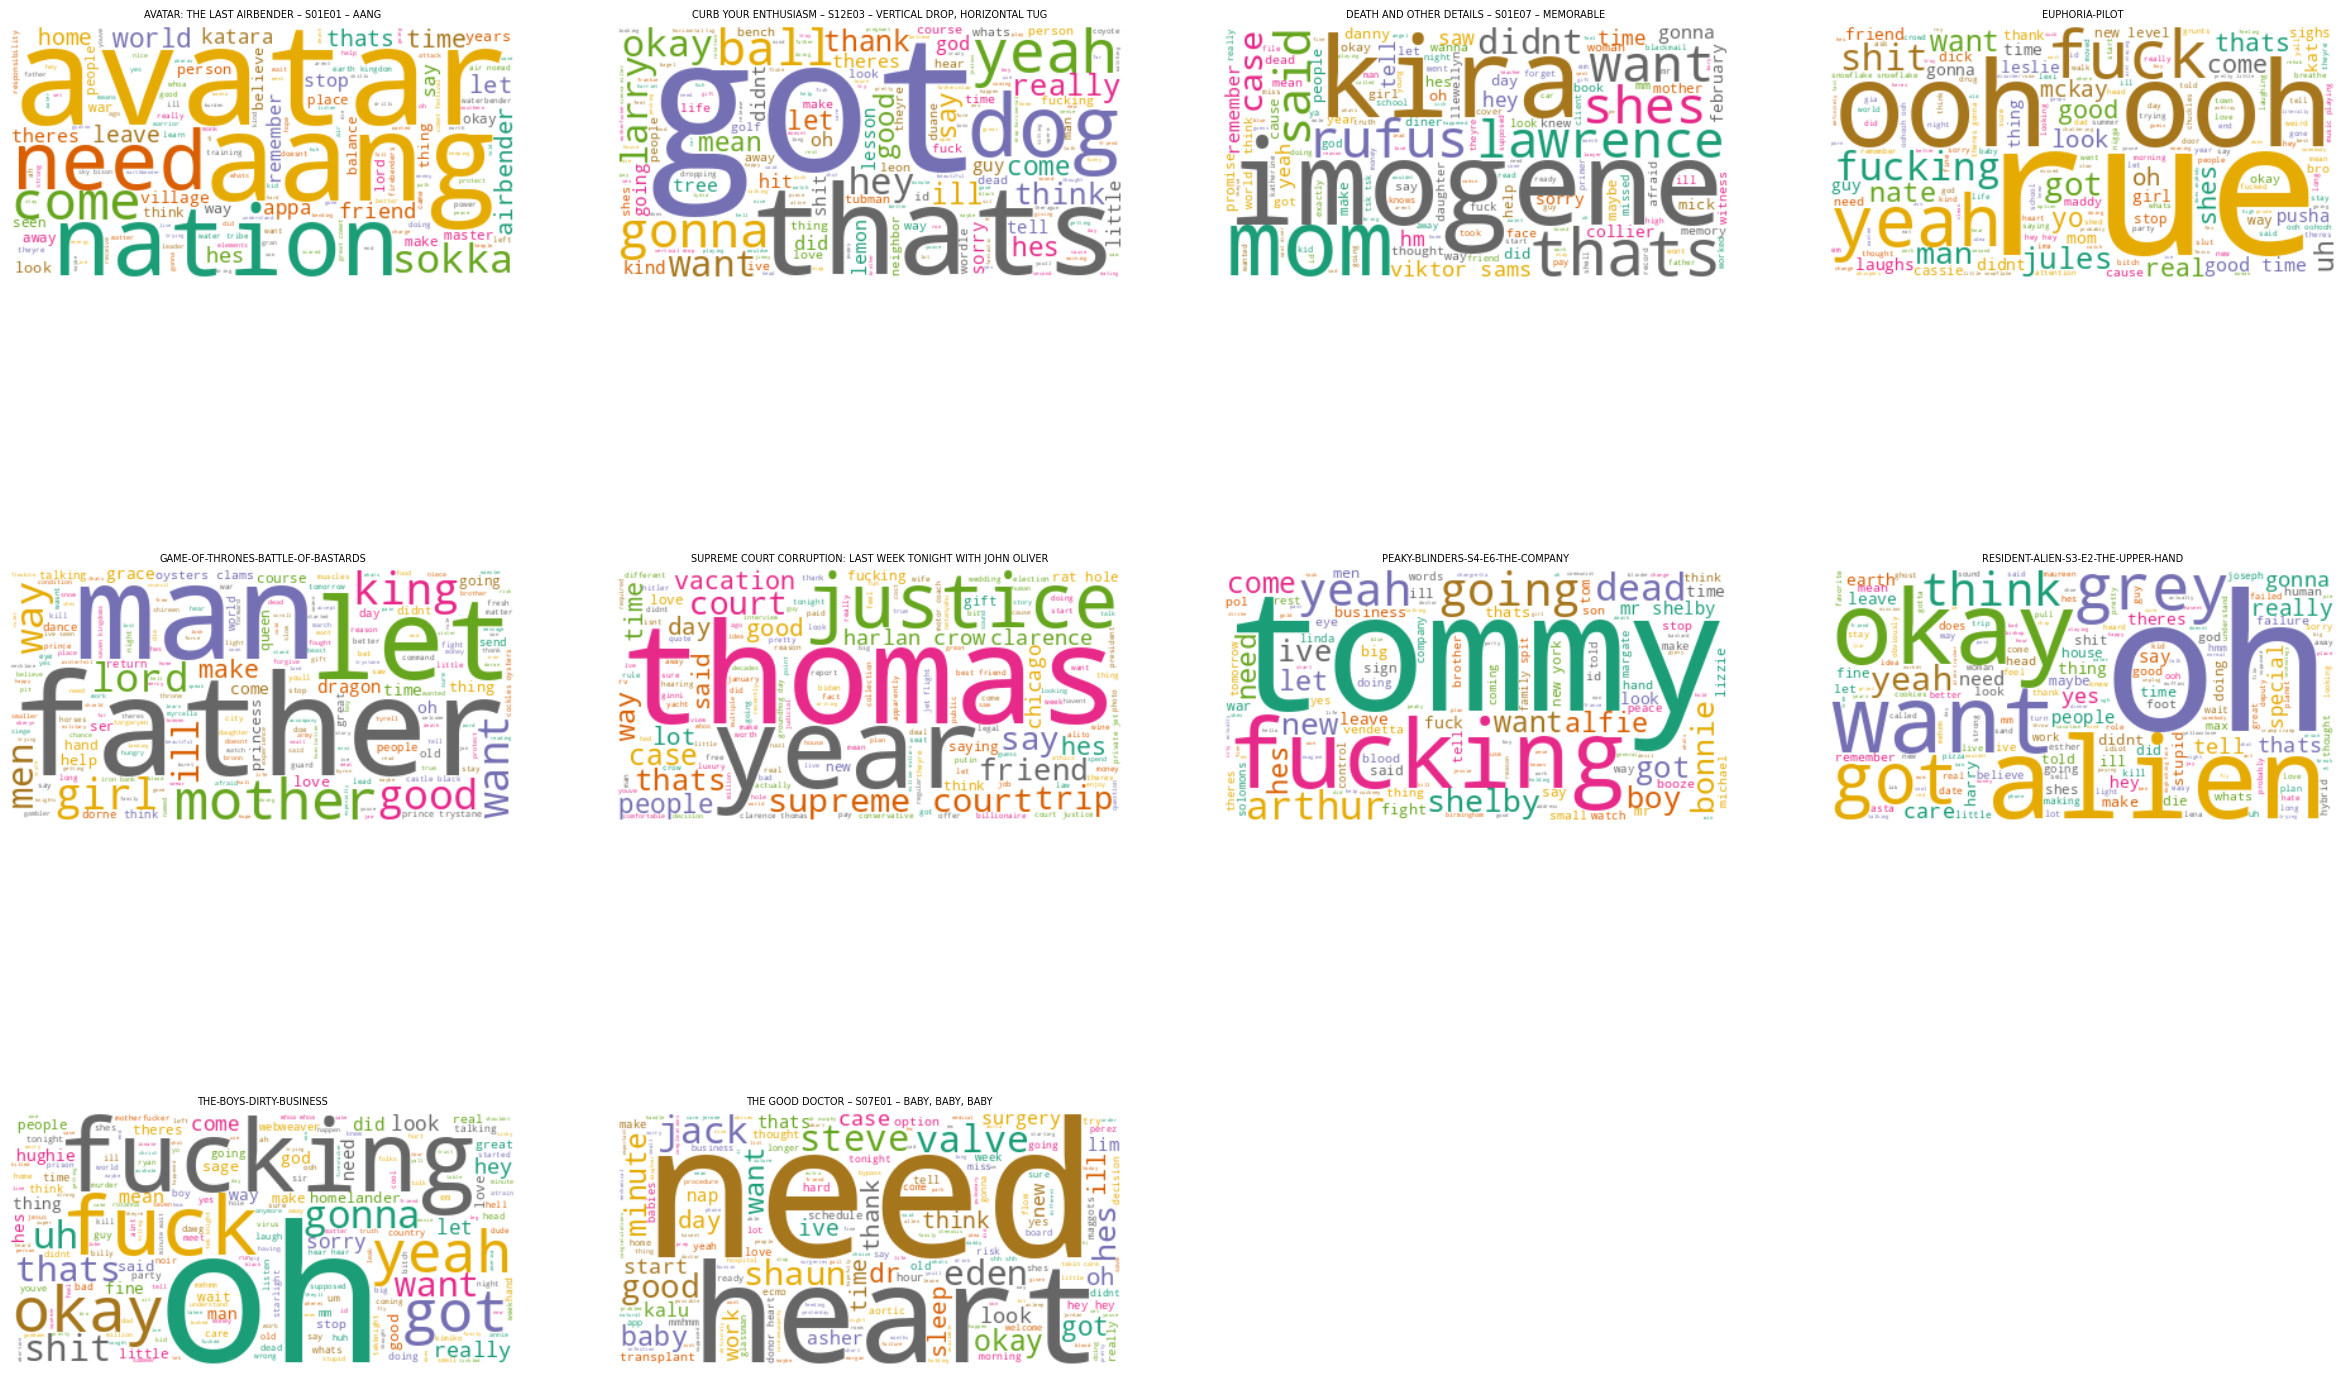

In [13]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 20]


full_names = ['AVATAR: THE LAST AIRBENDER – S01E01 – AANG', 'CURB YOUR ENTHUSIASM – S12E03 – VERTICAL DROP, HORIZONTAL TUG', 'DEATH AND OTHER DETAILS – S01E07 – MEMORABLE','EUPHORIA-PILOT','GAME-OF-THRONES-BATTLE-OF-BASTARDS', 'SUPREME COURT CORRUPTION: LAST WEEK TONIGHT WITH JOHN OLIVER','PEAKY-BLINDERS-S4-E6-THE-COMPANY', 'RESIDENT-ALIEN-S3-E2-THE-UPPER-HAND','THE-BOYS-DIRTY-BUSINESS', 'THE GOOD DOCTOR – S07E01 – BABY, BABY, BABY']


for index, episode in enumerate(data.columns):
    if(data_clean.transcript[episode]!=''):
        wc.generate(data_clean.transcript[episode])
        plt.subplot(3, 4, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(full_names[index],fontsize = 7)

plt.show()

#### Observations from WordClouds
1. Peaky Blinders , Euphoria The Boys: These series prominently feature the F-word in their dialogues. This suggests that the tone of these shows is intense likely targeting an adult audience.

2. The Good Doctor: Words like need , heart , surgery are more prominent, indicating a focus on emotional and medical themes rather than explicit language.
3. Avatar: The Last Airbender: This show’s word cloud features words like "avatar," "nation," and "aang," reflecting its transcript with little to no use of strong profanity, making it more suitable for younger audiences.


#### Check the profanity by analysing the common bad words .Further find which episodes have highest profanity using scatter plots , which might be unsuitable for younger audiences

In [14]:
# take a look at the most common words.
from collections import Counter

Counter(stop_words_list).most_common()

[('dont', 9),
 ('im', 9),
 ('youre', 8),
 ('know', 7),
 ('just', 7),
 ('right', 6),
 ('like', 6),
 ('got', 5),
 ('yeah', 5),
 ('okay', 4),
 ('thats', 3),
 ('fucking', 3),
 ('good', 3),
 ('need', 2),
 ('gonna', 2),
 ('hey', 2),
 ('fuck', 2),
 ('way', 2),
 ('want', 2),
 ('oh', 2),
 ('avatar', 1),
 ('aang', 1),
 ('come', 1),
 ('sokka', 1),
 ('nation', 1),
 ('world', 1),
 ('time', 1),
 ('dog', 1),
 ('imogene', 1),
 ('kira', 1),
 ('mom', 1),
 ('shes', 1),
 ('lawrence', 1),
 ('rufus', 1),
 ('didnt', 1),
 ('said', 1),
 ('rue', 1),
 ('ooh', 1),
 ('shit', 1),
 ('father', 1),
 ('man', 1),
 ('let', 1),
 ('mother', 1),
 ('girl', 1),
 ('lord', 1),
 ('ill', 1),
 ('men', 1),
 ('thomas', 1),
 ('court', 1),
 ('supreme', 1),
 ('years', 1),
 ('justice', 1),
 ('clarence', 1),
 ('say', 1),
 ('harlan', 1),
 ('tommy', 1),
 ('shelby', 1),
 ('going', 1),
 ('new', 1),
 ('mr', 1),
 ('bonnie', 1),
 ('dead', 1),
 ('alien', 1),
 ('think', 1),
 ('heart', 1),
 ('shaun', 1),
 ('steve', 1),
 ('hes', 1),
 ('eden', 1),
 

In [15]:
#count of profane words in each series
data_bad_words = data.transpose()[['fucking','fuck','shit','asshole','bastard','motherfucker','whore']]
data_bad_words

,fucking,fuck,shit,asshole,bastard,motherfucker,whore
Avatar: The Last Airbender,0,0,0,0,0,0,0
Curb Your Enthusiasm,12,12,14,2,0,4,0
Death and Other Details,1,4,0,0,0,0,0
Euphoria,35,41,29,0,0,0,4
Game Of Thrones,0,0,1,0,1,0,0
Last Week Tonight with John Oliver,9,2,1,0,0,0,0
Peaky Blinders,25,6,1,0,3,0,0
Resident Alien,0,0,9,2,0,0,0
The Boys,47,41,20,3,0,4,2
The Good Doctor,0,0,0,0,0,0,0


####Divide profane words into two classes strong and mild profanietes

In [35]:
import pandas as pd

# Divide words into strong and mild profanity

#strong profanities  = asshole , bastard , motherfucker , whore
#mild_profanities = fuck , fucking , shit

data_profanity = pd.concat([
    data_bad_words.asshole + data_bad_words.bastard + data_bad_words.whore + data_bad_words.motherfucker,  # Strong profanity
    data_bad_words.fuck + data_bad_words.fucking + data_bad_words.shit ], axis=1) # Mild profanity

data_profanity.columns = ['strong_profanity', 'mild_profanity']


data_profanity.columns


Index(['strong_profanity', 'mild_profanity'], dtype='object')

In [61]:
print(data_profanity.mild_profanity.max())
print(data_profanity.strong_profanity.max())


108
9


<ipython-input-66-322aa5d50554>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (data_profanity['mild_profanity'][i], data_profanity['strong_profanity'][i]),


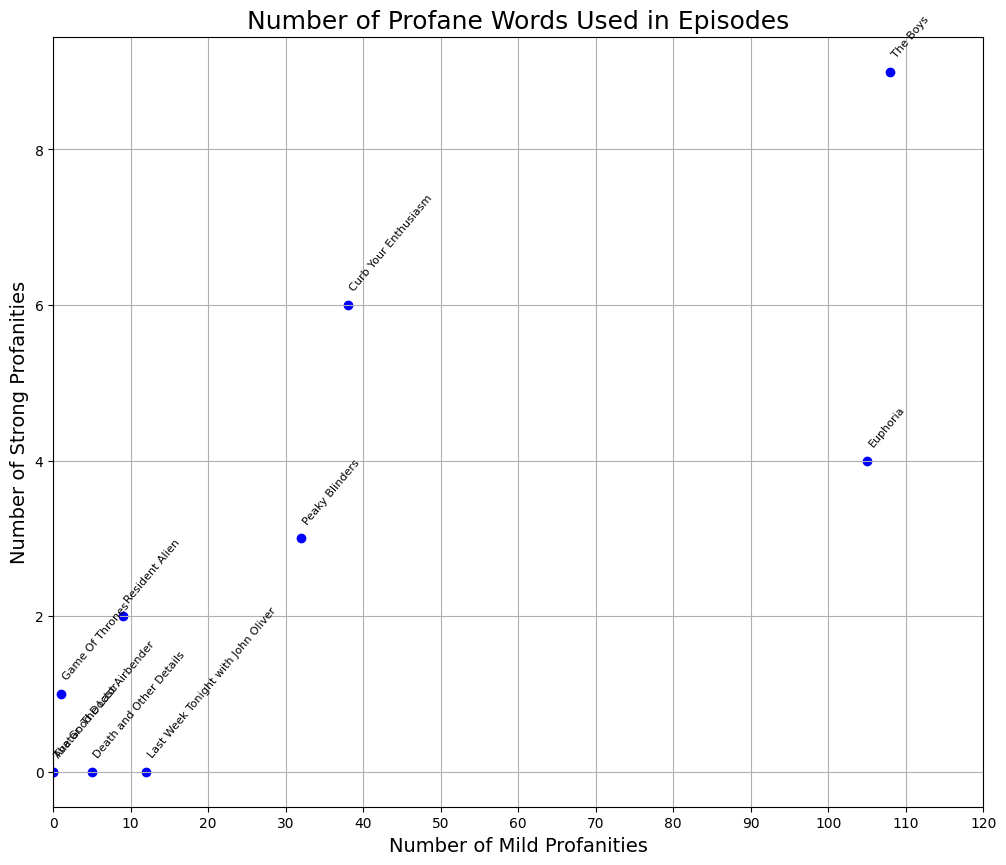

In [66]:
import matplotlib.pyplot as plt

# Create a scatter plot with the modifications
plt.figure(figsize=(12, 10))

# Scatter plot for Mild Profanities vs Strong Profanities
plt.scatter(data_profanity['mild_profanity'], data_profanity['strong_profanity'], color='blue')

# Set the labels and title with a larger font size for better visibility
plt.xlabel('Number of Mild Profanities', fontsize=14)
plt.ylabel('Number of Strong Profanities', fontsize=14)
plt.title('Number of Profane Words Used in Episodes', fontsize=18)

# Set the x-axis range from 0 to 120
plt.xlim(0, 120)

# Set the x-axis ticks at intervals of 10
plt.xticks(ticks=range(0, 121, 10), fontsize=10)

# Adjust the y-axis tick size for readability
plt.yticks(fontsize=10)

# Add grid for better visibility
plt.grid(True)

# Add labels for the episodes
for i, txt in enumerate(data_profanity.index):
    plt.annotate(txt, (data_profanity['mild_profanity'][i], data_profanity['strong_profanity'][i]),
                 fontsize=8, rotation=50, textcoords="offset points", xytext=(0, 10))

plt.show()


####FINDINGS FROM SCATTER PLOT
As the graph is plotted between Mild vs Strong profanities (whose number is less in the data), the height of the graph can be interpreted as the intenstiy of profane words and the length on x axis represents the number of profanities used

* **Explicit language** -  
 The Boys , Euphoria  have the highest number of both strong and mild profanities and thus are suited for above 18 age group straight away

* **Moderately Explicit** -
 Curb your enthusiasm and Peaky Blinders with less no of mild_profanities which shows that usually common slangs are mostly used.

* **Suitable for younger audiences** -
Avatar,Resident Alien and other series clustering near the origin of graph have lowest profanities, which might make them appropriate for younger audiences.

####**After removing profane words and stop words , we will be further deducing major topics in topic modeeling **

In [18]:
# Removed profane words from the document-term matrix
data_dtm_cleaned = data_dtm_new.drop(columns=['fucking', 'fuck', 'shit', 'asshole', 'bastard', 'motherfucker', 'whore'])

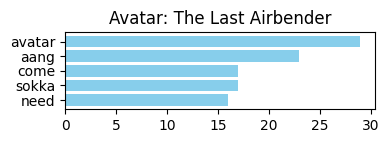

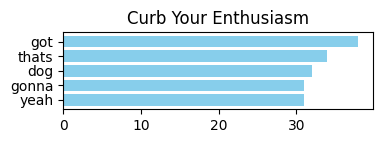

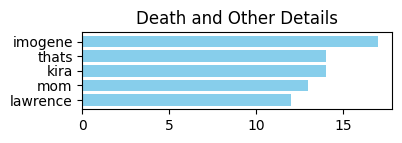

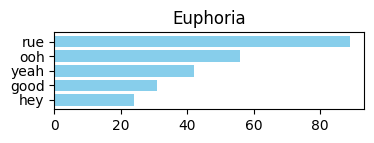

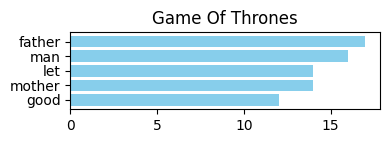

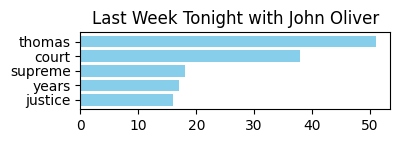

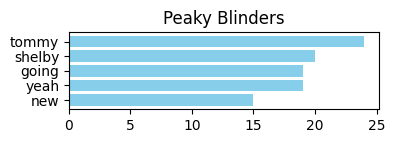

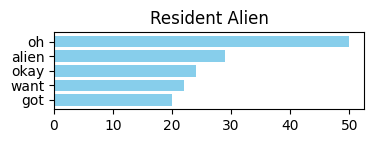

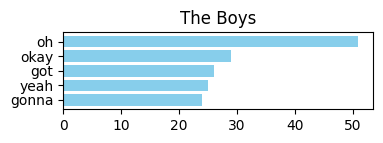

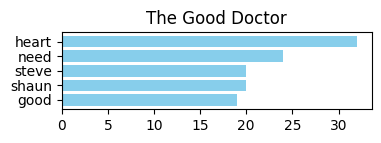

In [19]:
# Loop through each series and get the top 5 words
for show in data_dtm_cleaned.index:
    top_words = data_dtm_cleaned.loc[show].sort_values(ascending=False).head(5)
    words = top_words.index
    counts = top_words.values

    # Plotting
    plt.figure(figsize=(4, 1))
    plt.barh(words, counts, color='skyblue')

    plt.title(f'{show}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

 **Character Mentions**
* In Peaky Blinders, the word "Tommy" is highly prominent, indicating that the character Tommy Shelby is central to the dialogues in the episodes analyzed.

**Thematic Focus**
* The Good Doctor with words like "heart" and "need" being prominent, indicating discussions around medical cases or emotional topics.
* Game of Thrones episodes focus on terms like "father," "mother," and "man," which reflects the show’s themes of power,family and epics.
